In [4]:
import pandas as pd
import numpy as np

import urllib

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
url = 'https://raw.githubusercontent.com/theengineeringworld/Python-data-science/master/spambase.data'
raw_data = urllib.request.urlopen(url)

dataset = np.loadtxt(raw_data,delimiter=",")
#len(dataset)

df = pd.DataFrame(data=dataset)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [49]:
df.iloc[:,-1].value_counts(normalize=True)

0.0    0.605955
1.0    0.394045
Name: 57, dtype: float64

In [55]:
# splitting training and test data
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,random_state=42,stratify=y) # stratification splits the classes equally bt train and test

In [56]:
# Using Multinomial NB
multiNB = MultinomialNB()
multiNB.fit(X_train,y_train)

y_pred = multiNB.predict(X_test)
accuracy_score(y_test,y_pred)

0.7697320782041999

In [58]:
# Using Bernoulli NB
bernNB = BernoulliNB(binarize=True)
bernNB.fit(X_train,y_train)

y_pred1 = bernNB.predict(X_test)

accuracy_score(y_test,y_pred1)

0.8660391020999276

In [59]:
# Using Gaussian's NB
gausNB = GaussianNB()

gausNB.fit(X_train,y_train)

y_pred3 = gausNB.predict(X_test)

accuracy_score(y_test,y_pred3)

0.8240405503258509

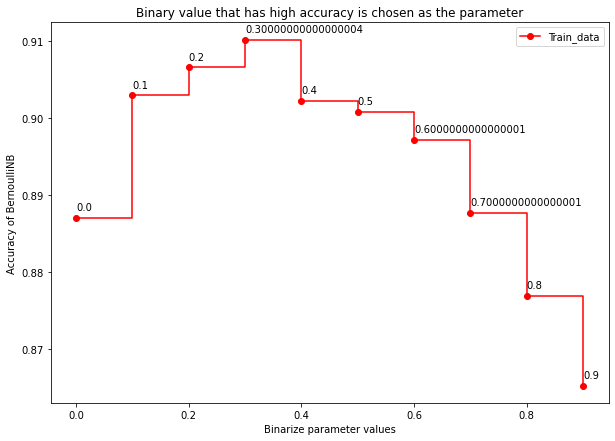

In [101]:
# Tuning the binarize parameter for Bernoulli's NB
binary = []
scr = []

for i in np.arange(0,1,.1):
    berNB = BernoulliNB(binarize=i)
    berNB.fit(X_train,y_train)
    y_pred4 = berNB.predict(X_test)
    binary.append(i)
    scr.append(accuracy_score(y_test,y_pred4))
    
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(binary,scr,marker='o',color='red',linestyle='-',drawstyle='steps-post',label='Train_data')
for i,j in zip(binary,scr):
    plt.text(i,j+0.001,i)

plt.xlabel('Binarize parameter values')
plt.ylabel('Accuracy of BernoulliNB')
plt.legend()
plt.title('Binary value that has high accuracy is chosen as the parameter')

plt.show()


In [102]:
berNB = BernoulliNB(binarize=0.3)
berNB.fit(X_train,y_train)
y_hat = berNB.predict(X_test)

print(f'Accuracy score achieved after parameter tuning is : {accuracy_score(y_test,y_hat)}')

Accuracy score achieved after parameter tuning is : 0.9102099927588704
